In [1]:
import pandas as pd
import numpy as np
from my_tools import get_bill_data
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix, log_loss, roc_curve, roc_auc_score



/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
np.random.seed(123)
data, in_progress = get_bill_data()

------------------
------------------
Data includes bills, joints resolutions, and laws with text from the 110th Congress (2007) to present
Make changes in my_tools.get_bill_data to modify the data set.
------------------


In [3]:
# # try all of the below with different datasets
# data = data[(data['congress_id'] == '115') | 
# #             (data['congress_id'] == '114') | 
# #             (data['congress_id'] == '113') |
# #             (data['congress_id'] == '112') 
#            ]

In [4]:
print('------------------')
print('Limiting dataset to significant numerical and categorical features...')
data_features = data.loc[:, [
#                             'sponsor',
                            'num_of_cosponsors', 
                            'sponsor_party', 
#                             'sponsor_state', 
                            'num_of_amendments',
                            'bill_char_counts', 
#                             'char_count_bucket',
                            'intro_month', 
                            'session', 
                            'labels'
                            ]]

# get dummies for intro_month, sponsor_party, sponsor_state, session
data_dumm = pd.get_dummies(data_features, columns = [
                                            'intro_month', 
#                                             'num_of_amendments', 
#                                             'num_of_cosponsors',
#                                             'sponsor',
                                            'sponsor_party', 
#                                             'sponsor_state', 
                                            'session', 
#                                             'char_count_bucket'
                                            ], 
                           drop_first=True)




# y = data_features.pop('labels').values.astype(int)
y = data_dumm.pop('labels').values.astype(int)



print('------------------')
print('Performing train-test split...')
X_train, X_test, y_train, y_test = train_test_split(data_dumm, y, stratify = y)
# X_train, X_test, y_train, y_test = train_test_split(data_features, y, stratify = y)

print('------------------')
print('Scaling the data...')
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


------------------
Limiting dataset to significant numerical and categorical features...
------------------
Performing train-test split...
------------------
Scaling the data...


In [5]:
# fit data to Logistic Regression
print('-------------------')
print('Training Logistic regression with continuous and categorical data...')
lr = LogisticRegression(C = 1, n_jobs = -1)
lr.fit(X_train, y_train)

print('-------------------')
print('Getting predictions...')
lr_y_pred = lr.predict(X_test)
lr_y_pred_proba = lr.predict_proba(X_test)[:,1]

print('-------------------')
print('F1 Score:\t\t{:.4f}'.format(f1_score(y_test, lr_y_pred)))
print('Recall Score:\t\t{:.4f}'.format(recall_score(y_test, lr_y_pred)))
print('Precision Score:\t{:.4f}'.format(precision_score(y_test, lr_y_pred)))
print('Accuracy Score:\t\t{:.4f}'.format(accuracy_score(y_test, lr_y_pred)))
print('Confusion Matrix')
print(confusion_matrix(y_test, lr_y_pred))

lr_fprs, lr_tprs, lr_thresh = roc_curve(y_test, lr_y_pred_proba)

-------------------
Training Logistic regression with continuous and categorical data...


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


-------------------
Getting predictions...
-------------------
F1 Score:		0.0073
Recall Score:		0.0037
Precision Score:	0.4000
Accuracy Score:		0.9658
Confusion Matrix
[[15285     3]
 [  539     2]]


In [6]:
# fit data to KNN Classifier
print('-------------------')
print('Training KNN Classifier with continuous and categorical data...')
kn = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)
kn.fit(X_train, y_train)

print('-------------------')
print('Getting predictions...')
kn_y_pred = kn.predict(X_test)
kn_y_pred_proba = kn.predict_proba(X_test)[:,1]

print('-------------------')
print('F1 Score:\t\t{:.4f}'.format(f1_score(y_test, kn_y_pred)))
print('Recall Score:\t\t{:.4f}'.format(recall_score(y_test, kn_y_pred)))
print('Precision Score:\t{:.4f}'.format(precision_score(y_test, kn_y_pred)))
print('Accuracy Score:\t\t{:.4f}'.format(accuracy_score(y_test, kn_y_pred)))
print('Confusion Matrix')
print(confusion_matrix(y_test, kn_y_pred))

kn_fprs, kn_tprs, kn_thresh = roc_curve(y_test, kn_y_pred_proba)

-------------------
Training KNN Classifier with continuous and categorical data...
-------------------
Getting predictions...
-------------------
F1 Score:		0.0540
Recall Score:		0.0296
Precision Score:	0.3077
Accuracy Score:		0.9646
Confusion Matrix
[[15252    36]
 [  525    16]]


In [7]:
print('-------------------')
print('Training Gradient Boosting Classifier with continuous and categorical data...')
gb = GradientBoostingClassifier(loss= 'deviance',             # default value
                                max_features = None,          # default value
                                learning_rate = .1,
                                n_estimators = 200,           # default value
                                criterion = 'friedman_mse',   # default value
                                min_samples_split = 2,        # default value
                                min_samples_leaf = 1,         # default value
                                max_depth = 8,
                                max_leaf_nodes = None)        # default value

gb.fit(X_train, y_train)

print('-------------------')
print('Getting predictions...')
gb_y_pred = gb.predict(X_test)
gb_y_pred_proba = gb.predict_proba(X_test)[:, 1]

print('-------------------')
print('F1 Score:\t\t{:.4f}'.format(f1_score(y_test, gb_y_pred)))
print('Recall Score:\t\t{:.4f}'.format(recall_score(y_test, gb_y_pred)))
print('Precision Score:\t{:.4f}'.format(precision_score(y_test, gb_y_pred)))
print('Accuracy Score:\t\t{:.4f}'.format(accuracy_score(y_test, gb_y_pred)))
print(confusion_matrix(y_test, gb_y_pred))

gb_fprs, gb_tprs, gb_thresh = roc_curve(y_test, gb_y_pred_proba)


-------------------
Training Gradient Boosting Classifier with continuous and categorical data...
-------------------
Getting predictions...
-------------------
F1 Score:		0.2413
Recall Score:		0.1922
Precision Score:	0.3240
Accuracy Score:		0.9587
[[15071   217]
 [  437   104]]


In [8]:
print('-------------------')
print('Training AdaBoost Classifier with continuous and categorical data...')
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), 
                         learning_rate=.05, 
                         n_estimators=100)

ada.fit(X_train, y_train)

print('-------------------')
print('Getting predictions...')
ada_y_pred = ada.predict(X_test)
ada_y_pred_proba = ada.predict_proba(X_test)[:, 1]

print('-------------------')
print('F1 Score:\t\t{:.4f}'.format(f1_score(y_test, ada_y_pred)))
print('Recall Score:\t\t{:.4f}'.format(recall_score(y_test, ada_y_pred)))
print('Precision Score:\t{:.4f}'.format(precision_score(y_test, ada_y_pred)))
print('Accuracy Score:\t\t{:.4f}'.format(accuracy_score(y_test, ada_y_pred)))
print(confusion_matrix(y_test, ada_y_pred))

ada_fprs, ada_tprs, ada_thresh = roc_curve(y_test, ada_y_pred_proba)


-------------------
Training AdaBoost Classifier with continuous and categorical data...
-------------------
Getting predictions...
-------------------
F1 Score:		0.0254
Recall Score:		0.0129
Precision Score:	0.7000
Accuracy Score:		0.9661
[[15285     3]
 [  534     7]]


---------------------------
With all data (2007 - 2018)
---------------------------
Logistic Regression ROC AUC Score: 	0.6115
KNN ROC AUC Score: 			0.6213
GradientBoost ROC AUC Score: 		0.7811
AdaBoost ROC AUC Score: 		0.8061


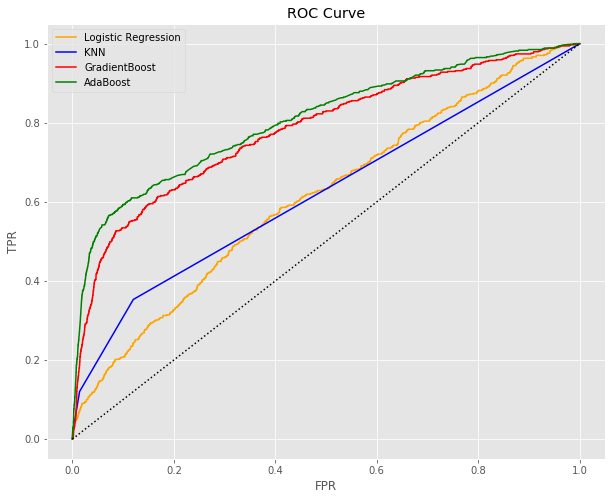

In [9]:
print('---------------------------')
print('With all data (2007 - 2018)')
print('---------------------------')
fig = plt.figure(figsize = (10, 8))
plt.plot(lr_fprs, lr_tprs, label = 'Logistic Regression', color = 'orange')
plt.plot(kn_fprs, kn_tprs, label = 'KNN', color = 'blue')
plt.plot(gb_fprs, gb_tprs, label = 'GradientBoost', color = 'red')
plt.plot(ada_fprs, ada_tprs, label = 'AdaBoost', color = 'green')
plt.plot([0, 1], [0, 1], 'k:')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

print('Logistic Regression ROC AUC Score: \t{:.4f}'.format(roc_auc_score(y_test, lr_y_pred_proba)))
print('KNN ROC AUC Score: \t\t\t{:.4f}'.format(roc_auc_score(y_test, kn_y_pred_proba)))
print('GradientBoost ROC AUC Score: \t\t{:.4f}'.format(roc_auc_score(y_test, gb_y_pred_proba)))
print('AdaBoost ROC AUC Score: \t\t{:.4f}'.format(roc_auc_score(y_test, ada_y_pred_proba)))